In [1]:
%pylab inline 
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in xrange(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


Populating the interactive namespace from numpy and matplotlib


WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: CUDA driver version is insufficient for CUDA runtime version)


[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.455424 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [32]:
def dist_centers(X, centers):
    return sqrt(sum((centers - X)*(centers - X), 1))

def kmeans(data, k, tolerance = 0, display=False, centers=None, last_error=sys.maxint):
    if centers == None:
        centers = data[choice(arange(len(data)), k)]
    #print 'Centers: ', centers
    errors = [dist_centers(x, centers) for x in data]
    partition = argmin(errors,1)
    
    #print partition
    sets = [data[partition==x] for x in arange(len(centers))]
    #print 'Sets: ', setsq
    new_centers = [mean(set, 0) for set in sets]
    #print 'New centers: ', new_centers
    error = sum(amin(errors,1))/len(data)
    
    print 'Error: ', error
        
    if abs(last_error - error) <= tolerance:
        return centers, partition
    else:
        if(display):
            scatter(data[:,0], data[:,1], c=array(['r', 'g', 'b', 'y', 'k', 'c', 'w'])[partition])
            scatter(centers[:,0], centers[:,1], 100, ['r', 'g', 'b', 'y', 'k', 'c', 'w'])
            show()
        return kmeans(data, k, tolerance, display, array(new_centers), error)

def dist_mixture(num, k, loc, scale, p = 10, bins = None ):
    if bins == None:
        bins = k
    samples_per_dist =  zip(arange(k), histogram(uniform(0, k, num), bins = bins)[0])
    #print samples_per_dist
    x = [array([normal(u, s, n) for (u, s) in zip(loc+p*move, scale)]).T for [move, n] in samples_per_dist]
    print array(x).shape
    return concatenate(x)
    
def print_hist(x, b= 10, label = "default"):
    hist, bins = np.histogram(x, bins=b)
    center = (bins[:-1] + bins[1:]) / 2
    w = 1.*(amax(x) - amin(x))/b
    
    plt.bar(center, hist, align='center', width=w)
    plt.title(label)
    plt.show()
    
# TESTS
print dist_centers(array([2,2]), array([[2,2]])), [0]
print dist_centers(array([2,2]), array([[2,2], [2,3]])), [0, 1]
print dist_centers(array([2,2]), array([[4,2], [4,3]])), [2, sqrt(5)]
print dist_centers(array([2,2]), array([[4,2], [4,3], [0, 0]])), [2, sqrt(5), 2*sqrt(2)]

[ 0.] [0]
[ 0.  1.] [0, 1]
[ 2.          2.23606798] [2, 2.2360679774997898]
[ 2.          2.23606798  2.82842712] [2, 2.2360679774997898, 2.8284271247461903]


In [11]:
X = [[[1],[2]],[[2],[3]],[[4],[3]]]
print concatenate(X)

data = [[5, 4], [1,2],[2,3],[4,3]]
Z = array([[1,2],[2,3],[4,3]])
print Z[:, newaxis] - data
print 'min:', amin(Z, 1)
Y = arange(10)
argmin(X,1)
mean(X,1)
i = choice(arange(len(Y)), 2)

print i, Y[i]
print [1, 2] == [1, 2, 3]

histogram(arange(100), bins = [0,3, 50, 54, 100])

[[1]
 [2]
 [2]
 [3]
 [4]
 [3]]
[[[-4 -2]
  [ 0  0]
  [-1 -1]
  [-3 -1]]

 [[-3 -1]
  [ 1  1]
  [ 0  0]
  [-2  0]]

 [[-1 -1]
  [ 3  1]
  [ 2  0]
  [ 0  0]]]
min: [1 2 3]
[3 8] [3 8]
False


(array([ 3, 47,  4, 46]), array([  0,   3,  50,  54, 100]))

150 150


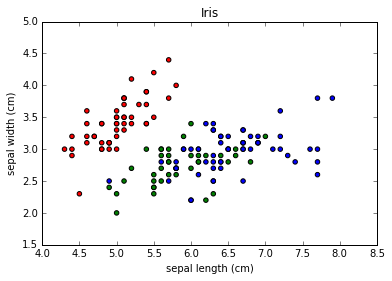

In [3]:
from sklearn import datasets 
iris = datasets.load_iris() 
print len(iris.data[:,0]), len(iris.target)
p = scatter(iris.data[:,0], iris.data[:,1], c=array(['r', 'g', 'b', 'y', 's'])[iris.target])
xlabel('sepal length (cm)')
ylabel('sepal width (cm)')
title('Iris')

In [ ]:
iris_data = iris.data[:, :2]
centers, colors = kmeans(iris_data, 3, 0, False)
print centers, len(colors)

A
(5,)
Error:  5.22070510619


/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


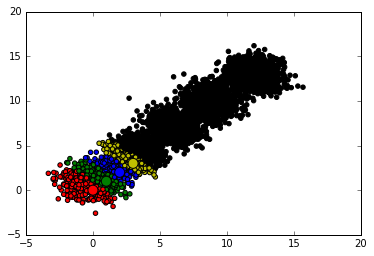

Error:  2.47496451876


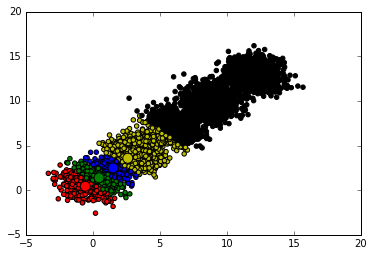

Error:  2.17414037389


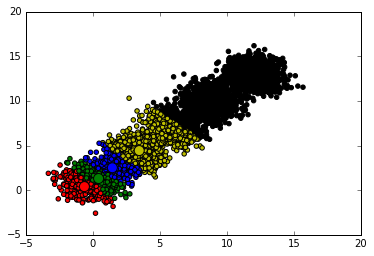

Error:  1.95673538529


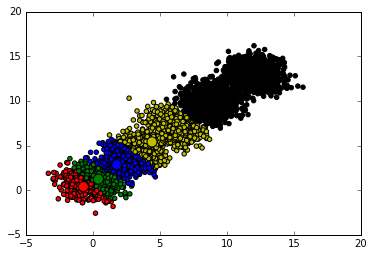

Error:  1.73938215811


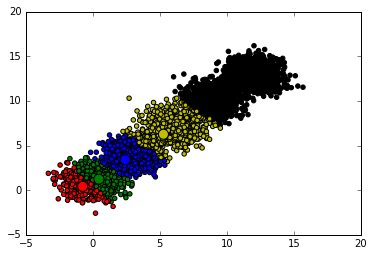

Error:  1.62913192563


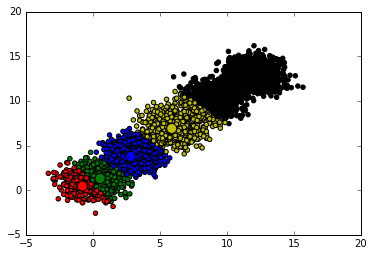

Error:  1.60170353253


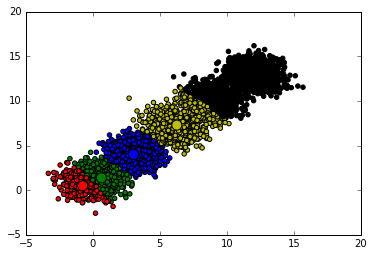

Error:  1.59387646311
B
Error:  5.25790158437
Error:  2.7025179775
Error:  2.27025035385
Error:  2.10053082288
Error:  2.01940232415
Error:  1.94647348084
Error:  1.80014087825
Error:  1.65830269822
Error:  1.61132070338
Error:  1.59930734583
Error:  1.59447351797
C
Error:  5.29305892484
Error:  2.78706054879
Error:  2.27389692119
Error:  1.93544876126
Error:  1.6825423317
Error:  1.61884715336
Error:  1.60265390751
Error:  1.59631981739
D
(5,)
Error:  5.84929606294
Error:  3.21284808612
Error:  2.63185361383
Error:  1.6861387163
Error:  1.43825147464
Error:  1.40570314668
Error:  1.39571188179
E
(5,)
Error:  2.3478197071
Error:  1.94263162607
Error:  1.82705417882
Error:  1.64361707865
Error:  1.58083146868
Error:  1.57821950771
F
(5,)
Error:  17.7994512827


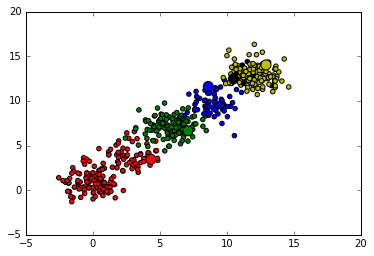

Error:  12.2043040933


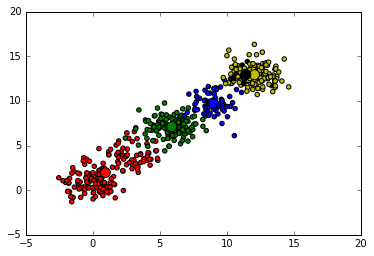

Error:  12.202224978


(array([[   0.92511447,    1.9640291 ,    2.99039899,    3.96116295,
            4.97549115,    6.0283286 ,    7.12022964,    7.93221615,
            9.08313609,   10.04568577,   10.89589914,   12.02532701,
           13.00341025,   14.05440646,   15.08567906,   15.91426741,
           17.03051634,   17.87773254,   19.05181178,   20.03640444,
           21.1076641 ,   22.07344145,   23.00211221,   23.96883022,
           25.12151862,   26.0388538 ,   26.9885307 ,   27.9731779 ,
           28.98239804,   29.97172522,   31.01253639,   31.94849463,
           32.99172839,   34.02008295,   35.00842675,   35.9474266 ,
           36.95320352,   38.10801542,   38.93775359,   40.00353608,
           41.08835914,   41.88696246,   43.05200823,   44.00710721,
           44.97489554,   45.96899334,   47.03458547,   48.03411761,
           49.11849149,   50.02554002,   51.10713212,   51.98447499,
           53.04641232,   53.85284736,   54.96877744,   56.03829836,
           56.96904841,   57.99273

In [65]:
#1 
centers = array([arange(5), arange(5)]).T
print 'A'
a = dist_mixture(5000, 5, arange(2), ones(2), 3)
kmeans(a, 5, 0.01, True, centers=centers)

print 'B'
centers[3] = [3, 0]
kmeans(a, 5, 0.01, False, centers=centers)

print 'C'
centers[1] = [3, 1]
kmeans(a, 5, 0.01, False, centers=centers)

print 'D'
a = dist_mixture(5000, 5, arange(2), ones(2), 3, [0, 0.2, 0.3, 0.6, 0.7, 1])
kmeans(a, 5, 0.01, False, centers=centers)

print 'E'
centers = array([arange(5), arange(5), arange(5)]).T
centers[3] = [3, 1, 0]
a = dist_mixture(5000, 5, arange(3), ones(3), 3, [0, 0.2, 0.3, 0.6, 0.7, 1])
kmeans(a, 5, 0.01, False)

print 'F'
a = dist_mixture(5000, 10, arange(100), ones(100), 3, [0, 0.2, 0.3, 0.6, 0.7, 1])
kmeans(a, 5, 0.01, True)

In [5]:
#2
data = dist_mixture(1000000, 1000, arange(1000), ones(1000), 100)
print data.shape

(1000,)
(1000000, 1000)


In [8]:
#2 cd
kmeans(data, 1000, 0, False)

KeyboardInterrupt: 

(10,)


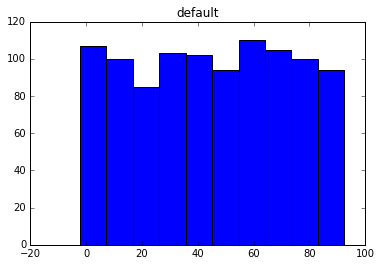

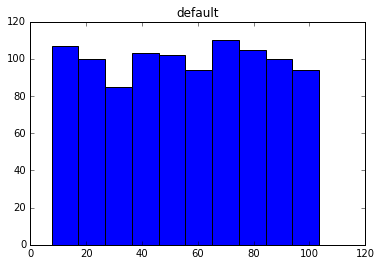

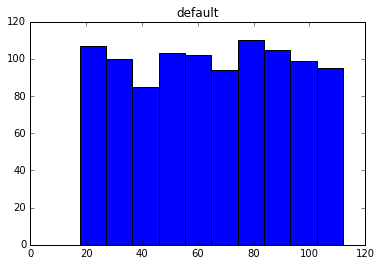

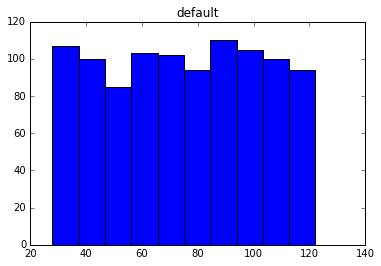

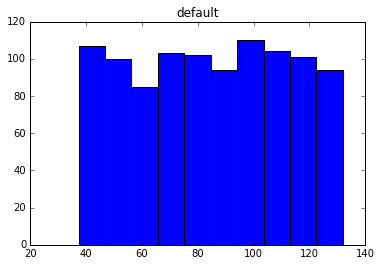

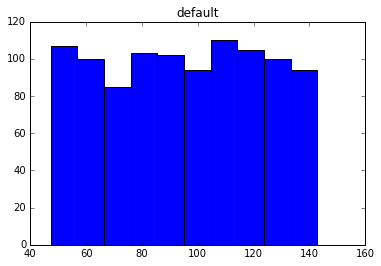

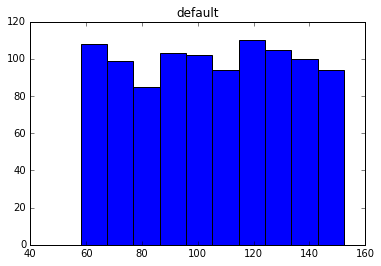

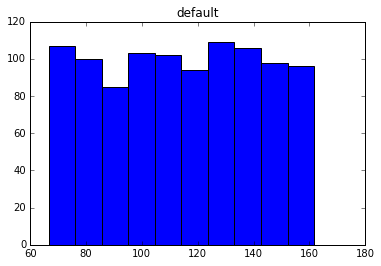

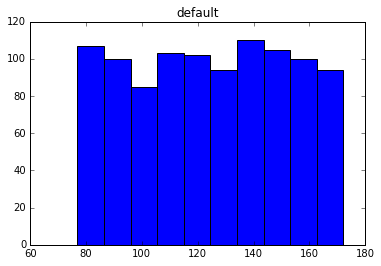

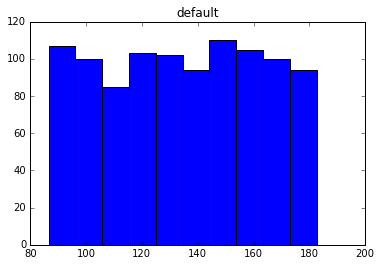

In [4]:
for hist in dist_mixture(1000, 10, arange(10)*10, ones(10)).T:
    print_hist(hist)

In [ ]:
image1 = imread('images.jpeg')
imshow(image1)
image =  image1.reshape((-1,3))
kmeaned = kmeans(image, 256, 0.1, False)
print kmeaned

[[ 178.04175084  113.68383838  150.64747475]
 [ 178.04175084  113.68383838  150.64747475]
 [ 178.04175084  113.68383838  150.64747475]
 ..., 
 [  61.9739479    52.00175351   39.85921844]
 [ 110.089        89.358        80.891     ]
 [ 110.089        89.358        80.891     ]]
(18921, 3)


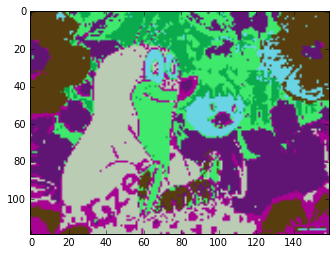

In [67]:
img = kmeaned[0][kmeaned[1]]
print img

print img.shape
imshow(img.reshape(shape))